# Assignment 3 - Data Prep

## Part1 - Read the CSV into a DataFrame

The CSV file is "cars_base.csv".  This data came from Riverside and you can see the original data and the notebook I used to create the csv from the data.

The first thing we will do is to pull all the data from the CSV file into a pandas dataframe and then look at the keys and the first five lines using the head() function.

Make note of any anomalies in the data.

In [2]:
# Your code here
import pandas as pd

data = pd.read_csv("cars_base.csv")
print(data.keys())
data.head(n=5)

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name'],
      dtype='object')


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


## _Notes_ 

Some of the columns may be confusing to a lot of people without the proper units attached to them.

There are 9 different columns in the csv. None of the columns are very precise. They all are either integers or float values that are always x.0. I believe the origin number is depending on where the car was manufactured but I cannot tell what numbers mean what for the first 5.

## Part 2 - Quick Overview
Lets get a quick overview of the data using the info() function.

In [3]:
# Your code here
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(5), int64(3), object(1)
memory usage: 28.1+ KB


## _Notes_

There are a total of 398 entries and the cars name is an object. We are missing 6 data points for horsepower but other than that there is no missing data.

## Part 3 - Look at the object fields
We can pull out information about the cylinder and year fields using the value_counts() method

In [7]:
# Your code here
print(data["cylinders"].value_counts())
print(data["model year"].value_counts())

cylinders
4    204
8    103
6     84
3      4
5      3
Name: count, dtype: int64
model year
73    40
78    36
76    34
82    31
75    30
70    29
79    29
80    29
81    29
71    28
72    28
77    28
74    27
Name: count, dtype: int64


## _Notes_

Cyclinders:
We can see that the cyclinders have 5 different values that it can have. The majority are in 4 or 8 and there are barely any 5 or 3 cyclinder cars so we may change those to 4 and 6.

Model Year:
There is not an equal number of cars in each model year they have so we will want to make sure to use a stratified split when splitting them up to make sure we have the same ratio in our training and test set.

## Part 4 - Look at the numerical fields
We can look at numerical fields using the describe() function. We get some basic information.  Do we have any missing values?

In [8]:
# Your code here
data.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


## _Notes_

You can see that the horsepower is missing 6 values. We may need to use the mean to replace those six null values to keep the data clean or remove those cars entirely. There is a max of 3 for origin so we know there is only 1, 2, 3 for options on that. 

## Part 5 - Get Distributions
To really understand what is going on in the data, we will need to see a distribution. One of the common ways of doing this is to use a histogram. 

array([[<Axes: title={'center': 'mpg'}>,
        <Axes: title={'center': 'cylinders'}>,
        <Axes: title={'center': 'displacement'}>],
       [<Axes: title={'center': 'horsepower'}>,
        <Axes: title={'center': 'weight'}>,
        <Axes: title={'center': 'acceleration'}>],
       [<Axes: title={'center': 'model year'}>,
        <Axes: title={'center': 'origin'}>, <Axes: >]], dtype=object)

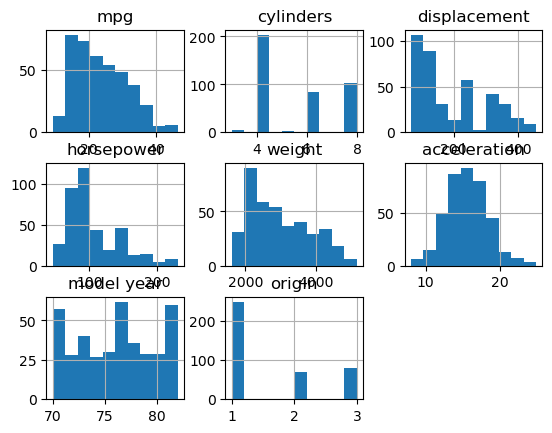

In [9]:
# Your code here
import matplotlib.pyplot as plt

data.hist()

## _Notes_ 

We can see that displacement, horsepower, acceleration, and weight are all unimodal. The cylinders have values with very little data. Model year is decently distributed but 3 years have much more than the rest. A lot of our histograms are skewed to the right.

## Part 6 Visualize the data
Lets make a copy of the data set and do some simple graphs.

array([[<Axes: xlabel='mpg', ylabel='mpg'>,
        <Axes: xlabel='cylinders', ylabel='mpg'>,
        <Axes: xlabel='displacement', ylabel='mpg'>,
        <Axes: xlabel='horsepower', ylabel='mpg'>,
        <Axes: xlabel='weight', ylabel='mpg'>,
        <Axes: xlabel='acceleration', ylabel='mpg'>,
        <Axes: xlabel='model year', ylabel='mpg'>,
        <Axes: xlabel='origin', ylabel='mpg'>],
       [<Axes: xlabel='mpg', ylabel='cylinders'>,
        <Axes: xlabel='cylinders', ylabel='cylinders'>,
        <Axes: xlabel='displacement', ylabel='cylinders'>,
        <Axes: xlabel='horsepower', ylabel='cylinders'>,
        <Axes: xlabel='weight', ylabel='cylinders'>,
        <Axes: xlabel='acceleration', ylabel='cylinders'>,
        <Axes: xlabel='model year', ylabel='cylinders'>,
        <Axes: xlabel='origin', ylabel='cylinders'>],
       [<Axes: xlabel='mpg', ylabel='displacement'>,
        <Axes: xlabel='cylinders', ylabel='displacement'>,
        <Axes: xlabel='displacement', ylabel='

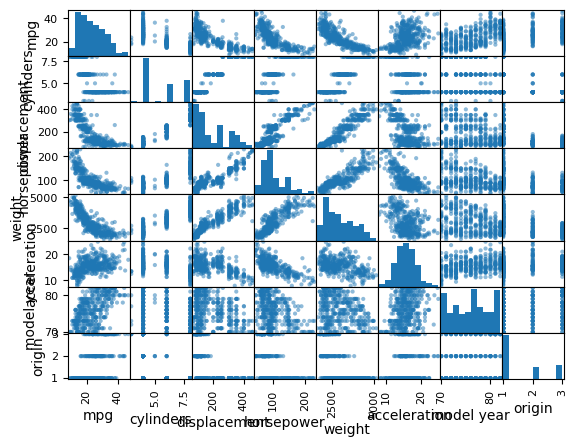

In [21]:
# Your code here
from pandas.plotting import scatter_matrix

copy = data.copy()
columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin', 'car name']
scatter_matrix(copy[columns])

## _Notes_  

You can start to see some relation between a few different columns. Displacement and weight is starting to show a correlation as well as horse power and weight.

## Part 7 - Do Correlation

Check the numerical parameters and see if any are strongly correlated.  This can give an idea of dimensions that are predictive of each other.

In [22]:
# Your code here
copy.drop('car name', inplace = True, axis=1)
corr = copy.corr()
print(corr)

                   mpg  cylinders  displacement  horsepower    weight  \
mpg           1.000000  -0.775396     -0.804203   -0.778427 -0.831741   
cylinders    -0.775396   1.000000      0.950721    0.842983  0.896017   
displacement -0.804203   0.950721      1.000000    0.897257  0.932824   
horsepower   -0.778427   0.842983      0.897257    1.000000  0.864538   
weight       -0.831741   0.896017      0.932824    0.864538  1.000000   
acceleration  0.420289  -0.505419     -0.543684   -0.689196 -0.417457   
model year    0.579267  -0.348746     -0.370164   -0.416361 -0.306564   
origin        0.563450  -0.562543     -0.609409   -0.455171 -0.581024   

              acceleration  model year    origin  
mpg               0.420289    0.579267  0.563450  
cylinders        -0.505419   -0.348746 -0.562543  
displacement     -0.543684   -0.370164 -0.609409  
horsepower       -0.689196   -0.416361 -0.455171  
weight           -0.417457   -0.306564 -0.581024  
acceleration      1.000000    0.2881

## _Notes_

There is not a ton of correlation within this list. We can see the displacement and cyclinders is fairly high. Displacement and weight is another area that we see a high correlation. We can see a negative correlation with weight and mpg. 

## Part 8 - A better scatter plot
We are interested in predicting mpg.  Pick a second numerical feature.  Plot those features against each other and color code for the number of cylinders. 

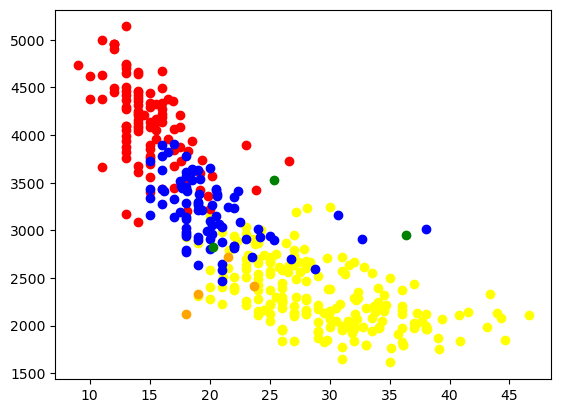

In [29]:
# Your code here
import matplotlib.pyplot as plt
import numpy as np

#Getting the different cyclinders
four_cylinder_mpg = np.ma.masked_where(data["cylinders"]!=4, data["mpg"])
eight_cylinder_mpg = np.ma.masked_where(data["cylinders"]!=8, data["mpg"])
six_cylinder_mpg = np.ma.masked_where(data["cylinders"]!=6, data["mpg"])
three_cylinder_mpg = np.ma.masked_where(data["cylinders"]!=3, data["mpg"])
five_cylinder_mpg = np.ma.masked_where(data["cylinders"]!=5, data["mpg"])


plt.scatter(x=four_cylinder_mpg, y = data['weight'], c="yellow")
plt.scatter(x=eight_cylinder_mpg, y = data['weight'], c="red") 
plt.scatter(x=six_cylinder_mpg, y = data['weight'], c="blue") 
plt.scatter(x=three_cylinder_mpg, y = data['weight'], c="orange") 
plt.scatter(x=five_cylinder_mpg, y = data['weight'], c="green") 
plt.show()

## _Notes_

This shows that when the weight is getting lower you are going to tend to see a higher mpg. The number of cyclinders also has somewhat of a correlation with mpg. The red signified 8 cylinders which shows that a high number of cylinders may lead to a worse mpg.

## Part 9 - Data repair
We are missing some horsepower values.  Replace the missing values with the median. 

In [32]:
# Your code here
horsepower_median = data["horsepower"].median()
print(horsepower_median)
data["horsepower"].fillna(value=horsepower_median, inplace=True)

data.info()

93.5
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    float64
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(5), int64(3), object(1)
memory usage: 28.1+ KB


## _Notes_

The horsepower median was 93.5. You can see in the data.info() that horsepower now has 398 non-null values.

## Part 10 - Create a new feature
Combine at least two features (do not include mpg since we will want to use it as the target feature) and put the result in the data frame.

Dividing or doing a Multiplication are typical choices. You can also combine using other functions like sine or exp or log.  Addition is less common since we are already building linear models which add features together.

In [34]:
# Your code here
data['force'] = data['weight'] * data['acceleration']
data.head(n=30)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,force
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu,42048.0
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320,42469.5
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite,37796.0
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst,41196.0
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino,36214.5
5,15.0,8,429.0,198.0,4341.0,10.0,70,1,ford galaxie 500,43410.0
6,14.0,8,454.0,220.0,4354.0,9.0,70,1,chevrolet impala,39186.0
7,14.0,8,440.0,215.0,4312.0,8.5,70,1,plymouth fury iii,36652.0
8,14.0,8,455.0,225.0,4425.0,10.0,70,1,pontiac catalina,44250.0
9,15.0,8,390.0,190.0,3850.0,8.5,70,1,amc ambassador dpl,32725.0


## _Notes_

I added in a a column that will show the force of the car. Using Newton's second law of motion I was able to multiply the weight times the acceleration to get the force.

## Part 11 - Split the data
Use the train_test_split() function to split the data set into training(75%) and test(25%) sets.  

In [39]:
# Your code here
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(data, test_size=0.25, random_state=123)
print(len(train_set), len(test_set))
print(train_set.head())
print(test_set.head())

298 100
      mpg  cylinders  displacement  horsepower  weight  acceleration  \
165  20.0          8         262.0       110.0  3221.0          13.5   
188  16.0          8         318.0       150.0  4190.0          13.0   
241  22.0          6         146.0        97.0  2815.0          14.5   
12   15.0          8         400.0       150.0  3761.0           9.5   
107  18.0          6         232.0       100.0  2789.0          15.0   

     model year  origin                car name    force  
165          75       1     chevrolet monza 2+2  43483.5  
188          76       1  dodge coronet brougham  54470.0  
241          77       3              datsun 810  40817.5  
12           70       1   chevrolet monte carlo  35729.5  
107          73       1             amc gremlin  41835.0  
      mpg  cylinders  displacement  horsepower  weight  acceleration  \
150  26.0          4         108.0        93.0  2391.0          15.5   
42   12.0          8         383.0       180.0  4955.0       

## _Notes_

It isn't perfectly 25% of the data because it wasn't a number divisible by 4 but there is a still a near 25% split in the training and test sets.

# Bonus
Create a new feature that is a weight category.  Do a split stratefied over this new feature.